In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set()

# 1) Data Cleaning

### <b>Ideas:<b>
    - Only look at people who were successfully iterviewed all 3 waves
    - Merge Wave1, Wave2 and Wave3 in order to look at the same population
    -
    -

    
    
    

In [2]:
Wave1 = pd.read_stata("Wave1.dta")
# display(Wave1.head(5))
# Wave1.info()

num_rows_start = Wave1.shape[0]

Wave1 = Wave1[Wave1['w1_nc_outcome'] == "Successfully Interviewed"]
deleted_rows = num_rows_start - Wave1.shape[0]

# display(Wave1.head(5))
# Wave1.info()
print("Number of people who were not interviewed in Wave 1: ", deleted_rows)

Number of people who were not interviewed in Wave 1:  0


In [3]:
Wave2 = pd.read_stata("Wave2.dta")
# display(Wave2.head(5))
# Wave2.info()

num_rows_start = Wave2.shape[0]

Wave2 = Wave2[Wave2['w2_nc_outcome'] == "Successfully Interviewed"]
deleted_rows = num_rows_start - Wave2.shape[0]

# display(Wave2.head(5))
# Wave2.info()
print("Number of people who were not interviewed in Wave 2: ", deleted_rows)

Number of people who were not interviewed in Wave 2:  1375


In [4]:
Wave3 = pd.read_stata("Wave3.dta")
# display(Wave3.head(5))
# Wave3.info()

num_rows_start = Wave3.shape[0]

Wave3 = Wave3[Wave3['w3_nc_outcome'] == "Successfully Interviewed"]
deleted_rows = num_rows_start - Wave3.shape[0]

# display(Wave3.head(5))
# Wave3.info()
print("Number of people who were not interviewed in Wave 3: ", deleted_rows)

Number of people who were not interviewed in Wave 3:  1968


## We have now narrrowed down our dataset to only the people who were successfully interviewed in all 3 waves.

# 2) Merge Wave1, Wave2 and Wave3

In [5]:
frames = [Wave1, Wave2, Wave3]
temp = pd.merge(Wave1, Wave2, how='inner', on='pid')
df = pd.merge(temp, Wave3, how='inner', on='pid')

display(df.head(5))
print("Number of people who were successfully interviewed in all 3 waves: ", df.shape[0])

,pid,w1_nc_outcome,w1_nc_intrv_c,w1_nc_intrv_d,w1_nc_intrv_m,w1_nc_intrv_y,w1_nc_duration,w1_nc_dob_m,w1_nc_dob_y,w1_nc_gen,...,w3_nc_smkprice_ld,w3_nc_smkbrand_ld,w3_nc_smkbrand_ld_o,w3_nc_smkcigday,w3_nc_smkbrand_after,w3_nc_smkbrand_after_o,w3_nc_intres,w3_nc_intlng1,w3_nc_intlng2,w3_nc_intlng3
0,301067,Successfully Interviewed,609,15th,May,2020,15.2,July,1971.0,Woman,...,NaN,NaN,,NaN,NaN,,Friendly,Sepedi,NaN,NaN
1,301079,Successfully Interviewed,609,22nd,May,2020,15.37,February,1970.0,Woman,...,NaN,NaN,,NaN,NaN,,Friendly,Sepedi,Sesotho,NaN
2,301082,Successfully Interviewed,624,4th,June,2020,25.27,June,1989.0,Man,...,NaN,NaN,,NaN,NaN,,Friendly,IsiXhosa,NaN,NaN
3,301086,Successfully Interviewed,644,4th,June,2020,17.18,June,1972.0,Woman,...,NaN,NaN,,NaN,NaN,,Friendly,IsiZulu,NaN,NaN
4,301088,Successfully Interviewed,630,27th,May,2020,21.13,May,1978.0,Man,...,NaN,NaN,,NaN,NaN,,Hostile,IsiXhosa,English,NaN


Number of people who were successfully interviewed in all 3 waves:  4508


In [6]:
personal_info_cols = [  'pid','w1_nc_dob_y', 'w2_nc_dob_y', 'w3_nc_dob_y',
                        'w1_nc_dob_m', 'w2_nc_dob_m', 'w3_nc_dob_m', 
                        'w1_nc_gen', 'w2_nc_gen', 'w3_nc_gen',
                        'w1_nc_popgrp',  'w3_nc_popgrp']

df_personal_all3 = df[personal_info_cols].copy()
df_personal_all3

,pid,w1_nc_dob_y,w2_nc_dob_y,w3_nc_dob_y,w1_nc_dob_m,w2_nc_dob_m,w3_nc_dob_m,w1_nc_gen,w2_nc_gen,w3_nc_gen,w1_nc_popgrp,w3_nc_popgrp
0,301067,1971.0,1971.0,1971.0,July,July,July,Woman,Woman,Woman,African/Black,African/Black
1,301079,1970.0,1970.0,1970.0,February,February,February,Woman,Woman,Woman,African/Black,African/Black
2,301082,1989.0,1989.0,1989.0,June,June,June,Man,Man,Man,African/Black,African/Black
3,301086,1972.0,1972.0,1972.0,June,June,June,Woman,Woman,Woman,African/Black,African/Black
4,301088,1978.0,1978.0,1978.0,May,May,May,Man,Man,Man,African/Black,African/Black
...,...,...,...,...,...,...,...,...,...,...,...,...
4503,799572,1989.0,1990.0,1989.0,August,August,August,Woman,Woman,Woman,African/Black,African/Black
4504,799619,1978.0,1978.0,1978.0,September,October,September,Man,Man,Man,African/Black,African/Black
4505,799644,1976.0,1976.0,1976.0,January,January,January,Woman,Woman,Woman,African/Black,African/Black
4506,799780,1996.0,1996.0,1996.0,July,July,July,Woman,Woman,Woman,Coloured,Coloured


There are several cases where the values are inconsistent across the different waves. I believe this is an input error since many of the entires will match. For example, the year of birth in record #4503 is (1989, 1990, 1989) yet the month of birth and gender is consistent (August, Woman). 
To clean this up, we should look at the triplet of columns (that we are interested in - birth date, gender, etc) and set all 3 values to whichever one appears most often.

In [8]:
df_personal = pd.DataFrame()
df_personal['pid'] = df_personal_all3['pid']
for index, row in df_personal_all3.iterrows():
    years = row[['w1_nc_dob_y', 'w2_nc_dob_y', 'w3_nc_dob_y']]
    months = row[['w1_nc_dob_m', 'w2_nc_dob_m', 'w3_nc_dob_m']]
    genders = row[['w1_nc_gen', 'w2_nc_gen', 'w3_nc_gen']]
    races = row[['w1_nc_popgrp',  'w3_nc_popgrp']]

    YearOfBirth = years.value_counts().idxmax()
    MonthOfBirth = months.value_counts().idxmax()
    Gender = genders.value_counts().idxmax()   
    Race = races.value_counts().idxmax()

    df_personal.loc[index, 'YearOfBirth'] = YearOfBirth
    df_personal.loc[index, 'MonthOfBirth'] = MonthOfBirth
    df_personal.loc[index, 'Gender'] = Gender
    df_personal.loc[index, 'Race'] = Race

df_personal

,pid,YearOfBirth,MonthOfBirth,Gender,Race
0,301067,1971.0,July,Woman,African/Black
1,301079,1970.0,February,Woman,African/Black
2,301082,1989.0,June,Man,African/Black
3,301086,1972.0,June,Woman,African/Black
4,301088,1978.0,May,Man,African/Black
...,...,...,...,...,...
4503,799572,1989.0,August,Woman,African/Black
4504,799619,1978.0,September,Man,African/Black
4505,799644,1976.0,January,Woman,African/Black
4506,799780,1996.0,July,Woman,Coloured


# 3) Clear reduntant columns and add personal info to main df

In [9]:
df_dropped = df.drop(personal_info_cols, axis=1)
df_main = pd.concat([df_personal, df_dropped], axis=1)
df_main

,pid,YearOfBirth,MonthOfBirth,Gender,Race,w1_nc_outcome,w1_nc_intrv_c,w1_nc_intrv_d,w1_nc_intrv_m,w1_nc_intrv_y,...,w3_nc_smkprice_ld,w3_nc_smkbrand_ld,w3_nc_smkbrand_ld_o,w3_nc_smkcigday,w3_nc_smkbrand_after,w3_nc_smkbrand_after_o,w3_nc_intres,w3_nc_intlng1,w3_nc_intlng2,w3_nc_intlng3
0,301067,1971.0,July,Woman,African/Black,Successfully Interviewed,609,15th,May,2020,...,NaN,NaN,,NaN,NaN,,Friendly,Sepedi,NaN,NaN
1,301079,1970.0,February,Woman,African/Black,Successfully Interviewed,609,22nd,May,2020,...,NaN,NaN,,NaN,NaN,,Friendly,Sepedi,Sesotho,NaN
2,301082,1989.0,June,Man,African/Black,Successfully Interviewed,624,4th,June,2020,...,NaN,NaN,,NaN,NaN,,Friendly,IsiXhosa,NaN,NaN
3,301086,1972.0,June,Woman,African/Black,Successfully Interviewed,644,4th,June,2020,...,NaN,NaN,,NaN,NaN,,Friendly,IsiZulu,NaN,NaN
4,301088,1978.0,May,Man,African/Black,Successfully Interviewed,630,27th,May,2020,...,NaN,NaN,,NaN,NaN,,Hostile,IsiXhosa,English,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,799572,1989.0,August,Woman,African/Black,Successfully Interviewed,609,15th,May,2020,...,NaN,NaN,,NaN,NaN,,Friendly,Sepedi,NaN,NaN
4504,799619,1978.0,September,Man,African/Black,Successfully Interviewed,616,21st,May,2020,...,5.0,Rudland & George (RG),,10.0,Pall Mall,,Friendly,Sepedi,Sesotho,NaN
4505,799644,1976.0,January,Woman,African/Black,Successfully Interviewed,633,16th,June,2020,...,NaN,NaN,,NaN,NaN,,Friendly,IsiZulu,NaN,NaN
4506,799780,1996.0,July,Woman,Coloured,Successfully Interviewed,614,10th,June,2020,...,80.0,Rothmans,,8.0,Rothmans,,Neither hostile nor friendly,Afrikaans,NaN,NaN


# 4) Delete all useless columns

In [10]:
useless_cols = [    'w1_nc_intrv_c','w2_nc_intrv_c','w3_nc_intrv_c',
                    'w1_nc_intrv_d','w2_nc_intrv_d','w3_nc_intrv_d',
                    'w1_nc_intrv_m','w2_nc_intrv_m','w3_nc_intrv_m',
                    'w1_nc_intrv_y','w2_nc_intrv_y','w3_nc_intrv_y',
                    'w1_nc_duration', 'w2_nc_duration','w3_nc_duration',
                    'w1_nc_popgrp_o']
df_new = df_main.drop(useless_cols, axis=1)
df_new


,pid,YearOfBirth,MonthOfBirth,Gender,Race,w1_nc_outcome,w1_nc_edschgrd,w1_nc_edter,w1_nc_prov,w1_nc_moveprov,...,w3_nc_smkprice_ld,w3_nc_smkbrand_ld,w3_nc_smkbrand_ld_o,w3_nc_smkcigday,w3_nc_smkbrand_after,w3_nc_smkbrand_after_o,w3_nc_intres,w3_nc_intlng1,w3_nc_intlng2,w3_nc_intlng3
0,301067,1971.0,July,Woman,African/Black,Successfully Interviewed,Grade 9 (Std. 7/ Form 2),No,Gauteng,No,...,NaN,NaN,,NaN,NaN,,Friendly,Sepedi,NaN,NaN
1,301079,1970.0,February,Woman,African/Black,Successfully Interviewed,Grade 6 (Std. 4),NaN,Gauteng,No,...,NaN,NaN,,NaN,NaN,,Friendly,Sepedi,Sesotho,NaN
2,301082,1989.0,June,Man,African/Black,Successfully Interviewed,Grade 10 (Std. 8/ Form 3),No,Gauteng,No,...,NaN,NaN,,NaN,NaN,,Friendly,IsiXhosa,NaN,NaN
3,301086,1972.0,June,Woman,African/Black,Successfully Interviewed,Grade 12 (Std10 / Matric / Senior Certificate ...,Yes,KwaZulu-Natal,No,...,NaN,NaN,,NaN,NaN,,Friendly,IsiZulu,NaN,NaN
4,301088,1978.0,May,Man,African/Black,Successfully Interviewed,Grade 10 (Std. 8/ Form 3),Yes,Eastern Cape,No,...,NaN,NaN,,NaN,NaN,,Hostile,IsiXhosa,English,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4503,799572,1989.0,August,Woman,African/Black,Successfully Interviewed,Grade 12 (Std10 / Matric / Senior Certificate ...,No,Limpopo,No,...,NaN,NaN,,NaN,NaN,,Friendly,Sepedi,NaN,NaN
4504,799619,1978.0,September,Man,African/Black,Successfully Interviewed,Grade 10 (Std. 8/ Form 3),No,Free State,Yes,...,5.0,Rudland & George (RG),,10.0,Pall Mall,,Friendly,Sepedi,Sesotho,NaN
4505,799644,1976.0,January,Woman,African/Black,Successfully Interviewed,Grade 12 (Std10 / Matric / Senior Certificate ...,No,KwaZulu-Natal,No,...,NaN,NaN,,NaN,NaN,,Friendly,IsiZulu,NaN,NaN
4506,799780,1996.0,July,Woman,Coloured,Successfully Interviewed,Grade 10 (Std. 8/ Form 3),No,Western Cape,No,...,80.0,Rothmans,,8.0,Rothmans,,Neither hostile nor friendly,Afrikaans,NaN,NaN


# 5) Plot demographic distributions
## a) Gender

<AxesSubplot:ylabel='Gender'>

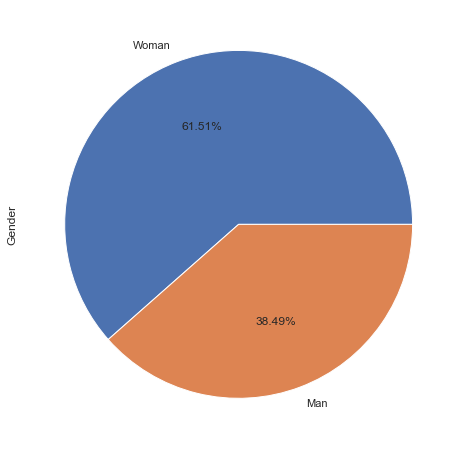

In [117]:
gender = df_new.Gender.value_counts()/df_new.shape[0]*100
gender.plot(kind='pie', figsize=(8,8), autopct = '%.2f%%')

## b) Race

<AxesSubplot:ylabel='Race'>

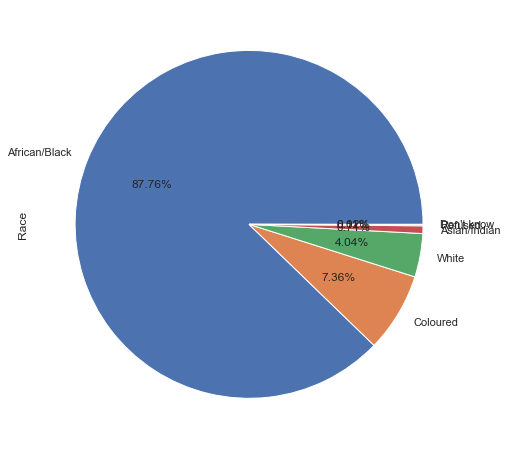

In [118]:
race = df_new.Race.value_counts()/df_new.shape[0]*100
race.plot(kind='pie', figsize=(8,8), autopct = '%.2f%%')

## c) Age - THIS IS EXTREMELY INCORRECT BUT ITS HERE FOR NOW

<AxesSubplot:ylabel='YearOfBirth'>

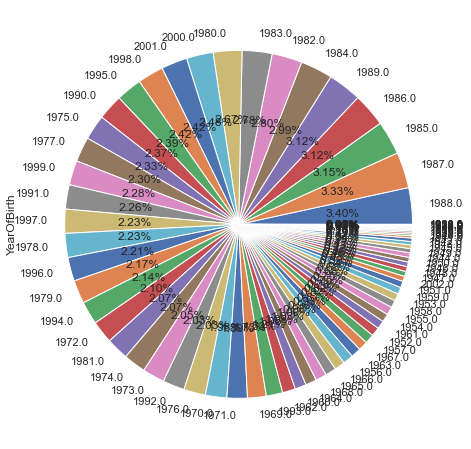

In [119]:
df_new.Race.isnull().sum()
df_new.YearOfBirth.unique()

Age = pd.to_numeric(df_new['YearOfBirth'], errors='coerce')

age = Age.value_counts()/df_new.shape[0]*100
age.plot(kind='pie', figsize=(8,8), autopct = '%.2f%%')